In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
from sklearn.model_selection import train_test_split

# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

# Import Bagging Classifier.
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# import data
data = pd.read_csv('clean_daily_oc.csv')

In [3]:
data.shape

(3651, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3651 non-null   object 
 1   day_of_week_1   3651 non-null   int64  
 2   day_of_week_2   3651 non-null   int64  
 3   day_of_week_3   3651 non-null   int64  
 4   day_of_week_4   3651 non-null   int64  
 5   day_of_week_5   3651 non-null   int64  
 6   day_of_week_6   3651 non-null   int64  
 7   is_holiday_1    3651 non-null   int64  
 8   Open_pct        3651 non-null   float64
 9   Close_pct       3651 non-null   float64
 10  Volume_diff     3651 non-null   float64
 11  Open_pct_l1     3651 non-null   float64
 12  Close_pct_l1    3651 non-null   float64
 13  Volume_diff_l1  3651 non-null   float64
 14  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(2)
memory usage: 428.0+ KB


#Preprocessing 

need to run dates from here 

In [5]:
data.columns

Index(['date', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'is_holiday_1',
       'Open_pct', 'Close_pct', 'Volume_diff', 'Open_pct_l1', 'Close_pct_l1',
       'Volume_diff_l1', 'direction'],
      dtype='object')

In [6]:
# drop text column 
#data.drop(columns='text',inplace=True)


In [7]:
# check if date is datetime object 
type(data.loc[0,'date'])

str

In [8]:
# check format of date 
data['date'][0]

'2011-07-31'

In [9]:
# convert str to date time 
datetime.datetime.strptime('2011-07-29','%Y-%m-%d').date()

datetime.date(2011, 7, 29)

In [10]:
# convert all dates to datetime objects 
data['date']= data['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d').date() )

In [11]:
# confirm results
type(data.loc[0,'date'])

datetime.date

In [12]:
# make date index 
data.set_index('date',inplace=True)

In [13]:
#confirm results
data.index

Index([2011-07-31, 2011-08-01, 2011-08-02, 2011-08-03, 2011-08-04, 2011-08-05,
       2011-08-06, 2011-08-07, 2011-08-08, 2011-08-09,
       ...
       2021-08-08, 2021-08-09, 2021-08-10, 2021-08-11, 2021-08-12, 2021-08-13,
       2021-08-14, 2021-08-15, 2021-08-16, 2021-08-17],
      dtype='object', name='date', length=3651)

In [14]:
# look at data types and check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 2011-07-31 to 2021-08-17
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week_1   3651 non-null   int64  
 1   day_of_week_2   3651 non-null   int64  
 2   day_of_week_3   3651 non-null   int64  
 3   day_of_week_4   3651 non-null   int64  
 4   day_of_week_5   3651 non-null   int64  
 5   day_of_week_6   3651 non-null   int64  
 6   is_holiday_1    3651 non-null   int64  
 7   Open_pct        3651 non-null   float64
 8   Close_pct       3651 non-null   float64
 9   Volume_diff     3651 non-null   float64
 10  Open_pct_l1     3651 non-null   float64
 11  Close_pct_l1    3651 non-null   float64
 12  Volume_diff_l1  3651 non-null   float64
 13  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 427.9+ KB


- No nulls 

- day_of_week and is_holiday should be dummified 


In [15]:
# dummify day_of_week and is_holiday
#data= pd.get_dummies(data,columns=['day_of_week','is_holiday'],drop_first=True)

In [16]:
# check results
#data.columns

In [17]:
# look at open,close, and volume columns 
#data[['Open','Close','Volume']].head()

- Change from actual value to change to percent change from the day before 

In [18]:
# change from values to percent change from previous day 
#data['Open_pct']= data['Open'].pct_change()
#data['Close_pct']= data['Close'].pct_change()
#data['Volume_diff']= data['Volume'].diff()

In [19]:
# check results 
#ata[['Open_pct','Close_pct','Volume_diff']]

In [20]:
# check how many nulls introduced 
#data.isnull().sum()

In [21]:
# drop first row 
#data= data[1:]

In [22]:
# confirm results
#data.info()

- Remove Open, Close, and Volume 

In [23]:
#data.drop(columns=['Open','Close','Volume'],inplace=True)

In [24]:
# confirm results
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 2011-07-31 to 2021-08-17
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week_1   3651 non-null   int64  
 1   day_of_week_2   3651 non-null   int64  
 2   day_of_week_3   3651 non-null   int64  
 3   day_of_week_4   3651 non-null   int64  
 4   day_of_week_5   3651 non-null   int64  
 5   day_of_week_6   3651 non-null   int64  
 6   is_holiday_1    3651 non-null   int64  
 7   Open_pct        3651 non-null   float64
 8   Close_pct       3651 non-null   float64
 9   Volume_diff     3651 non-null   float64
 10  Open_pct_l1     3651 non-null   float64
 11  Close_pct_l1    3651 non-null   float64
 12  Volume_diff_l1  3651 non-null   float64
 13  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 427.9+ KB


- Trying to predict Open_pct 

- Cannot use open_pct, Close_pct, and Volume_diff for the day being predicted because those will not be known in advance as we trying to predict how the market will change from closing the day before. 

- We will know the price from yesterday so we can add a lag for that. 

In [25]:
# add columns for previous days price info 
#data['Open_pct_l1']=data['Open_pct'].shift(1)
#data['Close_pct_l1']=data['Close_pct'].shift(1)
#data['Volume_diff_l1']=data['Volume_diff'].shift(1)

In [26]:
# drop first row since added lag 
#data= data[1:]

In [27]:
# make sure no nulls left 
#data.isnull().sum()

For classification add column for price going up,down, or same 

In [28]:
#def get_direction(value):
#    if value>0: return 'up'
#    elif value<0: return 'down'
#    else: return 'same'

In [29]:
#data['direction']=data['Open_pct'].apply(get_direction)

In [30]:
#data['direction'].value_counts(normalize=True)

Market has been going up so makes sense

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 2011-07-31 to 2021-08-17
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week_1   3651 non-null   int64  
 1   day_of_week_2   3651 non-null   int64  
 2   day_of_week_3   3651 non-null   int64  
 3   day_of_week_4   3651 non-null   int64  
 4   day_of_week_5   3651 non-null   int64  
 5   day_of_week_6   3651 non-null   int64  
 6   is_holiday_1    3651 non-null   int64  
 7   Open_pct        3651 non-null   float64
 8   Close_pct       3651 non-null   float64
 9   Volume_diff     3651 non-null   float64
 10  Open_pct_l1     3651 non-null   float64
 11  Close_pct_l1    3651 non-null   float64
 12  Volume_diff_l1  3651 non-null   float64
 13  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 427.9+ KB


# Classification models 

In [32]:
# define X and y 
X= data.drop(columns=['Open_pct','Close_pct','Volume_diff','direction'])
y=data['direction']

In [33]:
# train test split 
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                               shuffle=False)

## Logistic Regression 

In [34]:
logreg = LogisticRegression(penalty='none',random_state=42,)

# fit model 
logreg.fit(X_train,y_train)

LogisticRegression(penalty='none', random_state=42)

In [35]:
# get accuracy scores 
accuracy_score(y_train,logreg.predict(X_train))

0.43938356164383563

In [36]:
accuracy_score(y_test,logreg.predict(X_test))

0.43912448700410395

In [37]:
# for use with get_acc function 
# defines train/test split X and y for getting accuracy
vars_list1 = [X_train,X_test,y_train,y_test]

In [38]:
# helper function to get accuracy for model
def get_acc(model,vars_list):
    'given fitted model and [X_train,X_test,y_train,y_test] returns test and train accuracy'
    print(f'Train Accuracy: {accuracy_score(vars_list[2],model.predict(vars_list[0]))}')
    print(f'Test Accuracy: {accuracy_score(vars_list[3],model.predict(vars_list[1]))}')
    return

In [39]:
get_acc(logreg,vars_list1)

Train Accuracy: 0.43938356164383563
Test Accuracy: 0.43912448700410395


## KNN  

In [40]:
# scale data for KNN model 
ss= StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

# make vars list for metrics later 
vars_list_ss = [Xs_train,Xs_test,y_train,y_test]

In [41]:
# define params for gridsearch 
knn_params= {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'p':[1,2]
}


In [42]:
# instantiate knn_gs 
knn_gs = GridSearchCV(KNeighborsClassifier(n_jobs=-1),knn_params,n_jobs=-1,cv=3,verbose=2)

In [43]:
# fit knn_gs
knn_gs.fit(Xs_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [44]:
knn_gs.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [45]:
pd.DataFrame(knn_gs.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'param_p', 'param_weights', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [46]:
pd.DataFrame(knn_gs.cv_results_)[['param_n_neighbors', 'param_p', 'param_weights','mean_test_score']]

,param_n_neighbors,param_p,param_weights,mean_test_score
0,3,1,uniform,0.801021
1,3,1,distance,0.797254
2,3,2,uniform,0.796226
3,3,2,distance,0.793145
4,5,1,uniform,0.803073
5,5,1,distance,0.797592
6,5,2,uniform,0.801018
7,5,2,distance,0.798278
8,7,1,uniform,0.799989
9,7,1,distance,0.796907


In [47]:
get_acc(knn_gs,vars_list_ss)

Train Accuracy: 0.8359589041095891
Test Accuracy: 0.771545827633379


## Decision Tree 

In [48]:
# Instantiate model with random_state = 42.
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(Xs_train,y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
get_acc(dt,vars_list_ss)

Train Accuracy: 0.927054794520548
Test Accuracy: 0.7838577291381669


## Bagging Classifier 

In [126]:
# Instantiate and fit model 
bag = BaggingClassifier(random_state=42,bootstrap_features=True).fit(Xs_train,y_train)

In [127]:
# get metrics 
get_acc(bag,vars_list_ss)

Train Accuracy: 0.9198630136986301
Test Accuracy: 0.7852257181942545


## Random Forest 

In [52]:
# instantiate and fit model 
randfor = RandomForestClassifier(random_state=42,).fit(Xs_train,y_train)

In [53]:
# check metrics 
get_acc(randfor,vars_list_ss)

Train Accuracy: 0.927054794520548
Test Accuracy: 0.8071135430916553


# Searches 


In [156]:
ranfor_params ={
    'ccp_alpha':[0.0001,0.001,0.01,0.1,0.2,0.3,0.6]
}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=42),ranfor_params,cv=2,).fit(Xs_train,y_train)

In [171]:
print(get_acc(rf_gs,vars_list_ss))
gs_results(rf_gs)

Train Accuracy: 0.8356164383561644
Test Accuracy: 0.7838577291381669
None


,params,mean_test_score
2,{'ccp_alpha': 0.01},0.835274
1,{'ccp_alpha': 0.001},0.818836
3,{'ccp_alpha': 0.1},0.818836
0,{'ccp_alpha': 0.0001},0.817466
4,{'ccp_alpha': 0.2},0.542123
5,{'ccp_alpha': 0.3},0.460616
6,{'ccp_alpha': 0.6},0.460616


In [159]:
ranfor_params2 ={
    #'ccp_alpha':[0.0001,0.001,0.01,0.1,0.2,0.3,0.6] 0.01 best 
    'max_depth': [3,6,12,24,48,100,200,300]
}

rf_gs2 = GridSearchCV(RandomForestClassifier(random_state=42),ranfor_params2,cv=2,).fit(Xs_train,y_train)

In [162]:
print(get_acc(rf_gs2,vars_list_ss))
gs_results(rf_gs2)

Train Accuracy: 0.8472602739726027
Test Accuracy: 0.8002735978112175
None


,params,mean_test_score
1,{'max_depth': 6},0.836986
0,{'max_depth': 3},0.825685
2,{'max_depth': 12},0.819863
4,{'max_depth': 48},0.817466
5,{'max_depth': 100},0.817466
6,{'max_depth': 200},0.817466
7,{'max_depth': 300},0.817466
3,{'max_depth': 24},0.817123


<Figure size 720x720 with 0 Axes>

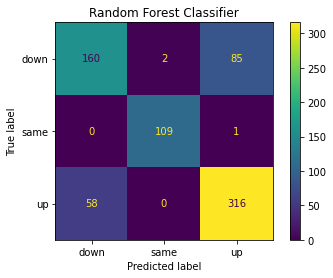

In [184]:
plt.figure(figsize=(10,10));
plot_confusion_matrix(rf_gs2,Xs_test,y_test);
plt.title('Random Forest Classifier');

## Confusion matrix  

In [169]:
ranfor_params3 ={
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False],
    'class_weight': ['balanced','balanced_subsample',None]}

rf_gs3 = GridSearchCV(RandomForestClassifier(random_state=42),ranfor_params3,cv=2,).fit(Xs_train,y_train)

In [170]:
print(get_acc(rf_gs3,vars_list_ss))
gs_results(rf_gs3)

Train Accuracy: 0.927054794520548
Test Accuracy: 0.8071135430916553
None


,params,mean_test_score
12,"{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_features': 'auto'}",0.817466
13,"{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt'}",0.817466
14,"{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_features': 'log2'}",0.817466
3,"{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}",0.815753
4,"{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}",0.815753
5,"{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2'}",0.815753
6,"{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'auto'}",0.815753
7,"{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'sqrt'}",0.815753
8,"{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2'}",0.815753
9,"{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'auto'}",0.815411


## Gradient Boosting 

In [54]:
# instantiate and fit gradient boosting model 
gradboost= GradientBoostingClassifier(random_state=42,).fit(Xs_train,y_train)

In [55]:
get_acc(gradboost,vars_list_ss)

Train Accuracy: 0.861986301369863
Test Accuracy: 0.8002735978112175


Tune Hyperparamters 

In [56]:
from scipy.stats import randint,uniform

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# params to search 
params_grad_boost1= {
    'loss':['deviance', 'exponential'],
    #'learning_rate':randint(0.001,0.4),
    'n_estimators' : randint(100,500),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,10),
}

gb1_rs1 = RandomizedSearchCV(GradientBoostingClassifier(random_state=42,),params_grad_boost1,n_iter=10,random_state=42,verbose=1,cv=3)

gb1_rs1.fit(Xs_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/tanveer/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tanveer/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tanveer/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/home/tanveer/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/home/tanveer/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 790, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueErro

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1e38c27f70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1e38c27ee0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1e38c27b50>},
                   random_state=42, verbose=1)

In [59]:
def gs_results(gs):
    return pd.DataFrame(gs.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

In [60]:
gs_results(gb1_rs1)

,params,mean_test_score
1,"{'loss': 'deviance', 'min_samples_leaf': 8, 'm...",0.823619
8,"{'loss': 'deviance', 'min_samples_leaf': 3, 'm...",0.820193
3,"{'loss': 'deviance', 'min_samples_leaf': 8, 'm...",0.819852
5,"{'loss': 'deviance', 'min_samples_leaf': 2, 'm...",0.817454
2,"{'loss': 'deviance', 'min_samples_leaf': 3, 'm...",0.812319
0,"{'loss': 'deviance', 'min_samples_leaf': 4, 'm...",0.811293
4,"{'loss': 'exponential', 'min_samples_leaf': 8,...",NaN
6,"{'loss': 'exponential', 'min_samples_leaf': 5,...",NaN
7,"{'loss': 'exponential', 'min_samples_leaf': 9,...",NaN
9,"{'loss': 'exponential', 'min_samples_leaf': 9,...",NaN


In [61]:
get_acc(gb1_rs1,vars_list_ss)

Train Accuracy: 0.8657534246575342
Test Accuracy: 0.8057455540355677


In [62]:
# params to search 
params_grad_boost2= {
    'loss':['deviance',],
    'learning_rate':uniform(0.001,0.4),
    'n_estimators' : randint(100,500),
    'min_samples_split':randint(3,30),
    'min_samples_leaf':randint(3,30),
}

gb1_rs2 = RandomizedSearchCV(GradientBoostingClassifier(random_state=42,),params_grad_boost2,n_iter=35,random_state=42,verbose=1,cv=3)

gb1_rs2.fit(Xs_train,y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=35,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1e38c29340>,
                                        'loss': ['deviance'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1e38c29430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1e38c31d90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1e38c32040>},
                   random_state=42, verbose=1)

In [63]:
get_acc(gb1_rs2,vars_list_ss)

Train Accuracy: 0.8414383561643836
Test Accuracy: 0.8030095759233926


In [128]:
gb1_rs2.best_params_

{'learning_rate': 0.007386500888085678,
 'loss': 'deviance',
 'min_samples_leaf': 4,
 'min_samples_split': 22,
 'n_estimators': 191}

In [129]:
pd.set_option('max_colwidth',None)
gs_results(gb1_rs2)

,params,mean_test_score
12,"{'learning_rate': 0.007386500888085678, 'loss': 'deviance', 'min_samples_leaf': 4, 'min_samples_split': 22, 'n_estimators': 191}",0.834918
26,"{'learning_rate': 0.030617860693636145, 'loss': 'deviance', 'min_samples_leaf': 9, 'min_samples_split': 28, 'n_estimators': 140}",0.834234
34,"{'learning_rate': 0.011167650697638077, 'loss': 'deviance', 'min_samples_leaf': 15, 'min_samples_split': 21, 'n_estimators': 162}",0.832862
14,"{'learning_rate': 0.014755408446087359, 'loss': 'deviance', 'min_samples_leaf': 16, 'min_samples_split': 19, 'n_estimators': 149}",0.832177
24,"{'learning_rate': 0.00320884684944096, 'loss': 'deviance', 'min_samples_leaf': 13, 'min_samples_split': 21, 'n_estimators': 180}",0.830127
2,"{'learning_rate': 0.024233444867279786, 'loss': 'deviance', 'min_samples_leaf': 26, 'min_samples_split': 23, 'n_estimators': 199}",0.830124
33,"{'learning_rate': 0.01717343581537254, 'loss': 'deviance', 'min_samples_leaf': 17, 'min_samples_split': 17, 'n_estimators': 445}",0.825672
28,"{'learning_rate': 0.13335920994105968, 'loss': 'deviance', 'min_samples_leaf': 18, 'min_samples_split': 25, 'n_estimators': 161}",0.816768
3,"{'learning_rate': 0.058146727168776315, 'loss': 'deviance', 'min_samples_leaf': 5, 'min_samples_split': 24, 'n_estimators': 408}",0.816429
31,"{'learning_rate': 0.04883769837532068, 'loss': 'deviance', 'min_samples_leaf': 16, 'min_samples_split': 5, 'n_estimators': 356}",0.816425


In [144]:
# params to search 
params_grad_boost3= {
    #'loss':['deviance',],
    #'learning_rate':uniform(0.00001,0.4),
    #'n_estimators' : randint(100,500),
    #'min_samples_split':randint(2,30),
    'min_samples_leaf':randint(1,30),
    # 'max_depth':randint(3,30) tested 3 is best 
}

gb1_rs3 = RandomizedSearchCV(GradientBoostingClassifier(random_state=42,),params_grad_boost3,n_iter=50,random_state=42,verbose=1,cv=3)

gb1_rs3.fit(Xs_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c816344f0>},
                   random_state=42, verbose=1)

In [145]:
gs_results(gb1_rs3)

,params,mean_test_score
4,{'min_samples_leaf': 11},0.827042
12,{'min_samples_leaf': 11},0.827042
13,{'min_samples_leaf': 11},0.827042
29,{'min_samples_leaf': 1},0.826358
19,{'min_samples_leaf': 3},0.826016
34,{'min_samples_leaf': 12},0.826016
30,{'min_samples_leaf': 12},0.826016
46,{'min_samples_leaf': 12},0.826016
24,{'min_samples_leaf': 12},0.826016
17,{'min_samples_leaf': 8},0.825673


In [143]:
gs_results(gb1_rs3)

,params,mean_test_score
26,{'max_depth': 3},0.826358
24,{'max_depth': 4},0.822933
20,{'max_depth': 4},0.822933
44,{'max_depth': 5},0.818485
17,{'max_depth': 5},0.818485
14,{'max_depth': 6},0.817456
45,{'max_depth': 7},0.814374
3,{'max_depth': 13},0.812317
10,{'max_depth': 13},0.812317
11,{'max_depth': 13},0.812317


## XGBClassifier 

In [65]:
# instantiate and fit model 
xgb_class = XGBClassifier().fit(Xs_train,y_train)

/home/tanveer/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:05:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
get_acc(xgb_class,vars_list_ss)

Train Accuracy: 0.9267123287671233
Test Accuracy: 0.8030095759233926


## SVM 

In [67]:
# instantiate and fit model 
svc = SVC(random_state=42,).fit(Xs_train,y_train)

In [68]:
get_acc(svc,vars_list_ss)

Train Accuracy: 0.8383561643835616
Test Accuracy: 0.79890560875513


## Feed Forward Neural Network 


In [151]:
# helper function to plot train and val accuracy 
def plot_acc(hist):
    plt.plot(hist.history['acc'], label='Train accuracy')
    plt.plot(hist.history['val_acc'], label='Test accuracy')
    plt.legend();

In [70]:
# check how many columns in X_train 
X_train.shape

(2920, 10)

In [71]:
# helper function 
def num_direction(value):
    if value=='up': return 1
    elif value=='down': return -1
    else: return 0


In [72]:
y_train.value_counts()

up      1345
down    1080
same     495
Name: direction, dtype: int64

In [73]:
# test if it works 
y_train.apply(num_direction)

date
2011-07-31    0
2011-08-01    1
2011-08-02   -1
2011-08-03   -1
2011-08-04    1
             ..
2019-08-03   -1
2019-08-04    0
2019-08-05   -1
2019-08-06   -1
2019-08-07   -1
Name: direction, Length: 2920, dtype: int64

In [74]:
# make y categorical for use with neural networks 
y_train_nn = to_categorical(y_train.apply(num_direction),3)
y_test_nn = to_categorical(y_test.apply(num_direction),3)

In [75]:
# for metrics later 
vars_nn = [Xs_train,Xs_test,y_train_nn,y_test_nn]

In [76]:
# model network 
fnn = Sequential()
fnn.add(Dense(128,activation="relu", input_shape=(10,)))
fnn.add(Dense(64, activation="relu"))
fnn.add(Dense(3, activation="softmax"))

# compile model 
fnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# check model 
fnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 9,859
Trainable params: 9,859
Non-trainable params: 0
_________________________________________________________________


In [77]:
pd.DataFrame(y_test_nn).isnull().sum()

0    0
1    0
2    0
dtype: int64

In [78]:
validation_data=(Xs_test,y_test_nn)

In [79]:
hist_fnn = fnn.fit(Xs_train,y_train_nn,batch_size=72,epochs=100,
                   validation_data=(Xs_test,y_test_nn),shuffle=False,)

Epoch 1/100
41/41 [==============================] - 0s 4ms/step - loss: 0.7504 - acc: 0.7034 - val_loss: 0.5072 - val_acc: 0.7729
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4396 - acc: 0.8123 - val_loss: 0.4823 - val_acc: 0.7880
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3898 - acc: 0.8178 - val_loss: 0.5058 - val_acc: 0.7907
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3754 - acc: 0.8216 - val_loss: 0.5194 - val_acc: 0.7893
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3683 - acc: 0.8264 - val_loss: 0.5257 - val_acc: 0.7893
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3637 - acc: 0.8281 - val_loss: 0.5288 - val_acc: 0.7934
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3603 - acc: 0.8288 - val_loss: 0.5307 - val_acc: 0.7893
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3575 - a

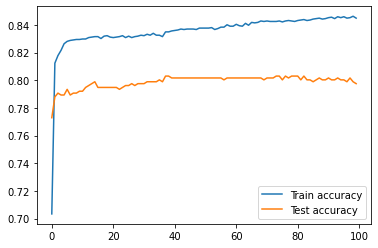

In [80]:
plot_acc(hist_fnn)

Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_631 (Dense)            (None, 128)               1408      
_________________________________________________________________
dense_632 (Dense)            (None, 30)                3870      
_________________________________________________________________
dense_633 (Dense)            (None, 3)                 93        
Total params: 5,371
Trainable params: 5,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
41/41 [==============================] - 0s 4ms/step - loss: 0.8381 - acc: 0.6298 - val_loss: 0.5644 - val_acc: 0.7428
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4899 - acc: 0.8007 - val_loss: 0.4759 - val_acc: 0.7661
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4040 - acc: 0.8209 - val_loss: 0.4894 - val

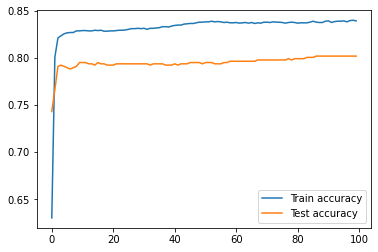

In [176]:
# model network 
fnn1 = Sequential()
fnn1.add(Dense(128,activation="relu", input_shape=(10,)))
fnn1.add(Dense(30, activation="relu"))
fnn1.add(Dense(3, activation="softmax"))

# compile model 
fnn1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# check model 
fnn1.summary()

hist_fnn1 = fnn1.fit(Xs_train,y_train_nn,batch_size=72,epochs=100,
                   validation_data=(Xs_test,y_test_nn),shuffle=False,)

plot_acc(hist_fnn1)

In [137]:
from sklearn.metrics import plot_confusion_matrix

In [141]:
#plot_confusion_matrix(fnn,Xs_test,y_test_nn)

In [81]:
# check results
#get_acc(fnn,vars_nn)

## RNN 

In [82]:
# Create training sequences
train_sequences = TimeseriesGenerator(Xs_train, y_train_nn, length=1,batch_size=64)

# Create Test Sequences
test_sequences = TimeseriesGenerator(Xs_test, y_test_nn, length=1,batch_size=64)

In [83]:
train_sequences[0][0].shape


(64, 1, 10)

In [84]:
len(test_sequences[0])


2

In [85]:
input_shape = train_sequences[0][0][0].shape

### rnn

In [86]:
# model network 

rnn = Sequential()
rnn.add(GRU(8,input_shape=input_shape, return_sequences=True))
rnn.add(GRU(8,return_sequences=False)) # false if next layer dense
rnn.add(Dense(10,activation='relu'))
rnn.add(Dense(3,activation='softmax'))

# compile model 
rnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 8)              480       
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 432       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 1,035
Trainable params: 1,035
Non-trainable params: 0
_________________________________________________________________


In [87]:
hist_rnn = rnn.fit(train_sequences,validation_data=test_sequences,
                  epochs=50,verbose=2)

Epoch 1/50
46/46 - 3s - loss: 1.0822 - acc: 0.4121 - val_loss: 1.0584 - val_acc: 0.4753
Epoch 2/50
46/46 - 0s - loss: 1.0352 - acc: 0.4443 - val_loss: 0.9981 - val_acc: 0.5055
Epoch 3/50
46/46 - 0s - loss: 0.9601 - acc: 0.4539 - val_loss: 0.9059 - val_acc: 0.5781
Epoch 4/50
46/46 - 0s - loss: 0.8555 - acc: 0.5844 - val_loss: 0.7930 - val_acc: 0.6384
Epoch 5/50
46/46 - 0s - loss: 0.7604 - acc: 0.5999 - val_loss: 0.7167 - val_acc: 0.6397
Epoch 6/50
46/46 - 0s - loss: 0.7049 - acc: 0.6002 - val_loss: 0.6814 - val_acc: 0.6397
Epoch 7/50
46/46 - 0s - loss: 0.6806 - acc: 0.5958 - val_loss: 0.6670 - val_acc: 0.6384
Epoch 8/50
46/46 - 0s - loss: 0.6700 - acc: 0.6009 - val_loss: 0.6580 - val_acc: 0.6438
Epoch 9/50
46/46 - 0s - loss: 0.6649 - acc: 0.6016 - val_loss: 0.6518 - val_acc: 0.6466
Epoch 10/50
46/46 - 0s - loss: 0.6611 - acc: 0.6047 - val_loss: 0.6503 - val_acc: 0.6466
Epoch 11/50
46/46 - 0s - loss: 0.6587 - acc: 0.6043 - val_loss: 0.6496 - val_acc: 0.6466
Epoch 12/50
46/46 - 0s - loss:

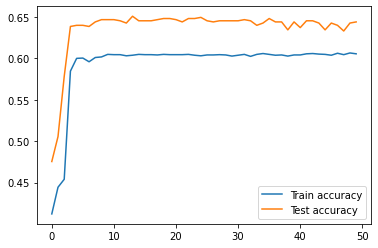

In [88]:
plot_acc(hist_rnn)

### rnn2

In [89]:
# model network 

rnn2 = Sequential()
rnn2.add(GRU(80,input_shape=input_shape, return_sequences=True))
rnn2.add(GRU(80,return_sequences=False)) # false if next layer dense
rnn2.add(Dense(10,activation='relu'))
rnn2.add(Dense(3,activation='softmax'))

# compile model 
rnn2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 1, 80)             22080     
_________________________________________________________________
gru_3 (GRU)                  (None, 80)                38880     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 61,803
Trainable params: 61,803
Non-trainable params: 0
_________________________________________________________________


In [90]:
hist_rnn2 = rnn2.fit(train_sequences,validation_data=test_sequences,
                  epochs=500,verbose=2)

Epoch 1/500
46/46 - 2s - loss: 0.9156 - acc: 0.4851 - val_loss: 0.7347 - val_acc: 0.5836
Epoch 2/500
46/46 - 0s - loss: 0.6882 - acc: 0.5762 - val_loss: 0.6596 - val_acc: 0.6370
Epoch 3/500
46/46 - 0s - loss: 0.6624 - acc: 0.6023 - val_loss: 0.6537 - val_acc: 0.6219
Epoch 4/500
46/46 - 0s - loss: 0.6583 - acc: 0.6009 - val_loss: 0.6496 - val_acc: 0.6370
Epoch 5/500
46/46 - 0s - loss: 0.6558 - acc: 0.6002 - val_loss: 0.6517 - val_acc: 0.6356
Epoch 6/500
46/46 - 0s - loss: 0.6545 - acc: 0.6002 - val_loss: 0.6479 - val_acc: 0.6288
Epoch 7/500
46/46 - 0s - loss: 0.6533 - acc: 0.6009 - val_loss: 0.6497 - val_acc: 0.6384
Epoch 8/500
46/46 - 0s - loss: 0.6547 - acc: 0.6047 - val_loss: 0.6522 - val_acc: 0.6370
Epoch 9/500
46/46 - 0s - loss: 0.6536 - acc: 0.6060 - val_loss: 0.6535 - val_acc: 0.6342
Epoch 10/500
46/46 - 0s - loss: 0.6534 - acc: 0.6040 - val_loss: 0.6513 - val_acc: 0.6274
Epoch 11/500
46/46 - 0s - loss: 0.6508 - acc: 0.6043 - val_loss: 0.6462 - val_acc: 0.6315
Epoch 12/500
46/46 

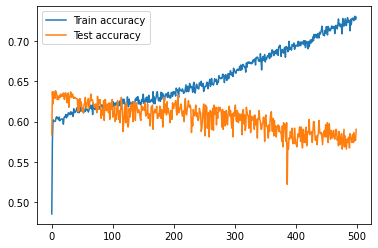

In [91]:
plot_acc(hist_rnn2)

### rnn3 <--rnn

adding another GRU+dense layer to rnn 

In [92]:
# model network 

rnn3 = Sequential()

rnn3.add(GRU(8,input_shape=input_shape, return_sequences=True))
rnn3.add(GRU(8,return_sequences=True))
rnn3.add(GRU(8,return_sequences=False)) # false if next layer dense

rnn3.add(Dense(10,activation='relu'))
rnn3.add(Dense(10,activation='relu'))

rnn3.add(Dense(3,activation='softmax'))

# compile model 
rnn3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 1, 8)              480       
_________________________________________________________________
gru_5 (GRU)                  (None, 1, 8)              432       
_________________________________________________________________
gru_6 (GRU)                  (None, 8)                 432       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 33        
Total params: 1,577
Trainable params: 1,577
Non-trainable params: 0
____________________________________________________

In [93]:
hist_rnn3 = rnn3.fit(train_sequences,validation_data=test_sequences,
                  epochs=100,verbose=2)

Epoch 1/100
46/46 - 4s - loss: 1.0817 - acc: 0.4460 - val_loss: 1.0535 - val_acc: 0.5110
Epoch 2/100
46/46 - 0s - loss: 0.9929 - acc: 0.5495 - val_loss: 0.8891 - val_acc: 0.6370
Epoch 3/100
46/46 - 0s - loss: 0.7885 - acc: 0.6002 - val_loss: 0.7033 - val_acc: 0.6397
Epoch 4/100
46/46 - 0s - loss: 0.6944 - acc: 0.6002 - val_loss: 0.6799 - val_acc: 0.6370
Epoch 5/100
46/46 - 0s - loss: 0.6713 - acc: 0.6002 - val_loss: 0.6718 - val_acc: 0.6370
Epoch 6/100
46/46 - 0s - loss: 0.6603 - acc: 0.6016 - val_loss: 0.6670 - val_acc: 0.6301
Epoch 7/100
46/46 - 0s - loss: 0.6558 - acc: 0.6029 - val_loss: 0.6534 - val_acc: 0.6425
Epoch 8/100
46/46 - 0s - loss: 0.6537 - acc: 0.6043 - val_loss: 0.6503 - val_acc: 0.6452
Epoch 9/100
46/46 - 0s - loss: 0.6519 - acc: 0.6043 - val_loss: 0.6505 - val_acc: 0.6466
Epoch 10/100
46/46 - 0s - loss: 0.6498 - acc: 0.6040 - val_loss: 0.6465 - val_acc: 0.6466
Epoch 11/100
46/46 - 0s - loss: 0.6494 - acc: 0.6040 - val_loss: 0.6450 - val_acc: 0.6466
Epoch 12/100
46/46 

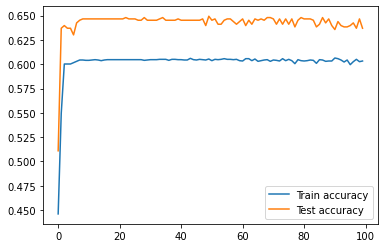

In [94]:
plot_acc(hist_rnn3)

Got higher peak test accuracy and much better overall 



### rnn4 <--rnn3
add another GRU layer + dense layer 

In [95]:
# model network 

rnn4 = Sequential()

rnn4.add(GRU(8,input_shape=input_shape, return_sequences=True))
rnn4.add(GRU(8,return_sequences=True))
rnn4.add(GRU(8,return_sequences=True))
rnn4.add(GRU(8,return_sequences=False)) # false if next layer dense

rnn4.add(Dense(10,activation='relu'))
rnn4.add(Dense(10,activation='relu'))
rnn4.add(Dense(10,activation='relu'))

rnn4.add(Dense(3,activation='softmax'))

# compile model 
rnn4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 1, 8)              480       
_________________________________________________________________
gru_8 (GRU)                  (None, 1, 8)              432       
_________________________________________________________________
gru_9 (GRU)                  (None, 1, 8)              432       
_________________________________________________________________
gru_10 (GRU)                 (None, 8)                 432       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [96]:
hist_rnn4 = rnn4.fit(train_sequences,validation_data=test_sequences,
                  epochs=100,verbose=2)

Epoch 1/100
46/46 - 5s - loss: 1.0764 - acc: 0.4539 - val_loss: 1.0336 - val_acc: 0.5110
Epoch 2/100
46/46 - 0s - loss: 0.9690 - acc: 0.5135 - val_loss: 0.8376 - val_acc: 0.6342
Epoch 3/100
46/46 - 0s - loss: 0.7623 - acc: 0.5995 - val_loss: 0.6804 - val_acc: 0.6384
Epoch 4/100
46/46 - 0s - loss: 0.6894 - acc: 0.6012 - val_loss: 0.6601 - val_acc: 0.6438
Epoch 5/100
46/46 - 0s - loss: 0.6729 - acc: 0.6036 - val_loss: 0.6588 - val_acc: 0.6438
Epoch 6/100
46/46 - 0s - loss: 0.6620 - acc: 0.6074 - val_loss: 0.6473 - val_acc: 0.6452
Epoch 7/100
46/46 - 0s - loss: 0.6552 - acc: 0.5999 - val_loss: 0.6494 - val_acc: 0.6233
Epoch 8/100
46/46 - 0s - loss: 0.6510 - acc: 0.6019 - val_loss: 0.6401 - val_acc: 0.6342
Epoch 9/100
46/46 - 0s - loss: 0.6528 - acc: 0.6060 - val_loss: 0.6471 - val_acc: 0.6260
Epoch 10/100
46/46 - 0s - loss: 0.6498 - acc: 0.6016 - val_loss: 0.6509 - val_acc: 0.6219
Epoch 11/100
46/46 - 0s - loss: 0.6491 - acc: 0.5988 - val_loss: 0.6440 - val_acc: 0.6288
Epoch 12/100
46/46 

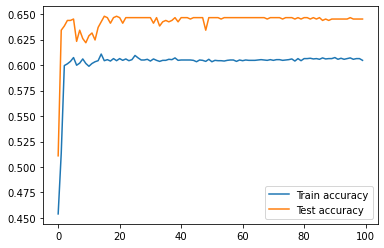

In [97]:
plot_acc(hist_rnn4)

CAN PROBABLY OPTIMIZE THIS MORE WILL COME BACK 

## LTSM 

In [98]:
Xs_train.shape

(2920, 10)

In [99]:
# make df? 
X_train_lstm= np.reshape(Xs_train,(Xs_train.shape[0],1,Xs_train.shape[1]))
X_test_lstm = np.reshape(Xs_test,(Xs_test.shape[0],1,Xs_test.shape[1]))

In [100]:
X_train_lstm.shape

(2920, 1, 10)

In [101]:
X_test_lstm.shape

(731, 1, 10)

In [146]:
# model network 

lstm = Sequential()
lstm.add(LSTM(40,input_shape=(1,10)))
lstm.add(Dense(30,activation='relu'))
lstm.add(Dense(3,activation='softmax'))


# compile model 
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

lstm.summary()

Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_202 (LSTM)              (None, 40)                8160      
_________________________________________________________________
dense_621 (Dense)            (None, 30)                1230      
_________________________________________________________________
dense_622 (Dense)            (None, 3)                 93        
Total params: 9,483
Trainable params: 9,483
Non-trainable params: 0
_________________________________________________________________


In [147]:
# fit model 
hist_lstm = lstm.fit(X_train_lstm,y_train_nn,
                     validation_data=(X_test_lstm,y_test_nn),
                  epochs=100,verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.9281 - acc: 0.6298 - val_loss: 0.7032 - val_acc: 0.7497
Epoch 2/100
92/92 - 0s - loss: 0.5597 - acc: 0.7818 - val_loss: 0.5019 - val_acc: 0.7811
Epoch 3/100
92/92 - 0s - loss: 0.4025 - acc: 0.8243 - val_loss: 0.5251 - val_acc: 0.7661
Epoch 4/100
92/92 - 0s - loss: 0.3713 - acc: 0.8168 - val_loss: 0.5381 - val_acc: 0.7866
Epoch 5/100
92/92 - 0s - loss: 0.3638 - acc: 0.8271 - val_loss: 0.5426 - val_acc: 0.7880
Epoch 6/100
92/92 - 0s - loss: 0.3587 - acc: 0.8288 - val_loss: 0.5472 - val_acc: 0.7866
Epoch 7/100
92/92 - 0s - loss: 0.3569 - acc: 0.8322 - val_loss: 0.5448 - val_acc: 0.7715
Epoch 8/100
92/92 - 0s - loss: 0.3544 - acc: 0.8260 - val_loss: 0.5334 - val_acc: 0.7825
Epoch 9/100
92/92 - 0s - loss: 0.3519 - acc: 0.8308 - val_loss: 0.5380 - val_acc: 0.7839
Epoch 10/100
92/92 - 0s - loss: 0.3498 - acc: 0.8267 - val_loss: 0.5319 - val_acc: 0.7702
Epoch 11/100
92/92 - 0s - loss: 0.3474 - acc: 0.8349 - val_loss: 0.5299 - val_acc: 0.7907
Epoch 12/100
92/92 

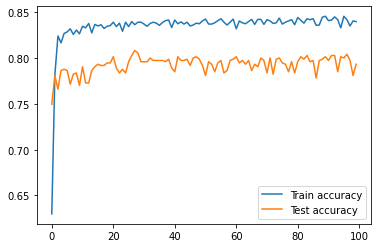

In [152]:
plot_acc(hist_lstm)

- Try more complex model 

### GridSearch  

In [105]:
# function to make models 
def model_func_lstm(nodes_lstm,nodes_dense):
    model = Sequential()
    model.add(LSTM(nodes_lstm,input_shape=(1,10)))
    model.add(Dense(nodes_dense,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model 

In [106]:
# wrapper 
lstm_modeler = KerasClassifier(build_fn=model_func_lstm,epochs=50)


In [107]:
# params to search over 
params_lstm = {
    'nodes_lstm':[8,64,120,240],
    'nodes_dense':[8,64,120,240]
}

In [108]:
# instantiate grid search 
lstm_gs = GridSearchCV(lstm_modeler,params_lstm,cv=3,verbose=1)

In [109]:
# fit lstm_gs 
lstm_gs.fit(X_train_lstm,y_train_nn)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


61/61 [==============================] - 1s 2ms/step - loss: 1.0974 - acc: 0.3417
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 1.0322 - acc: 0.4923
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.9657 - acc: 0.5252
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.8719 - acc: 0.5884
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.7419 - acc: 0.7194
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.6348 - acc: 0.7333
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.5626 - acc: 0.7441
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 0.5034 - acc: 0.7631
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4570 - acc: 0.7785
Epoch 10/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4251 - acc: 0.7914
Epoch 11/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4052 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  8.4min finished


92/92 [==============================] - 1s 3ms/step - loss: 0.9642 - acc: 0.7144
Epoch 2/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6205 - acc: 0.7969
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.4249 - acc: 0.8223
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3789 - acc: 0.8274
Epoch 5/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3686 - acc: 0.8233
Epoch 6/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3623 - acc: 0.8264
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3582 - acc: 0.8308
Epoch 8/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3570 - acc: 0.8240
Epoch 9/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3537 - acc: 0.8308
Epoch 10/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3514 - acc: 0.8257
Epoch 11/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3506 

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1c6158cfd0>,
             param_grid={'nodes_dense': [8, 64, 120, 240],
                         'nodes_lstm': [8, 64, 120, 240]},
             verbose=1)

In [110]:
def gs_results(gs):
    return pd.DataFrame(gs.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

In [111]:
gs_results(lstm_gs)

,params,mean_test_score
1,"{'nodes_dense': 8, 'nodes_lstm': 64}",0.825334
6,"{'nodes_dense': 64, 'nodes_lstm': 120}",0.825334
11,"{'nodes_dense': 120, 'nodes_lstm': 240}",0.823280
5,"{'nodes_dense': 64, 'nodes_lstm': 64}",0.823279
14,"{'nodes_dense': 240, 'nodes_lstm': 120}",0.822251
2,"{'nodes_dense': 8, 'nodes_lstm': 120}",0.821910
4,"{'nodes_dense': 64, 'nodes_lstm': 8}",0.821222
3,"{'nodes_dense': 8, 'nodes_lstm': 240}",0.819852
15,"{'nodes_dense': 240, 'nodes_lstm': 240}",0.819170
13,"{'nodes_dense': 240, 'nodes_lstm': 64}",0.819168


In [112]:
lstm_gs.best_params_

{'nodes_dense': 8, 'nodes_lstm': 64}

In [113]:
lstm_gs.score(X_train_lstm,y_train_nn)

92/92 [==============================] - 0s 1ms/step - loss: 0.3227 - acc: 0.8404


0.8404109477996826

In [114]:
lstm_gs.score(X_train_lstm,y_train_nn), lstm_gs.score(X_test_lstm,y_test_nn)

23/23 [==============================] - 0s 1ms/step - loss: 0.4864 - acc: 0.8044


(0.8404109477996826, 0.804377555847168)

In [177]:
# best lstm model 
# model network 

best_lstm = Sequential()
best_lstm.add(LSTM(64,input_shape=(1,10)))
best_lstm.add(Dense(8,activation='relu'))
best_lstm.add(Dense(3,activation='softmax'))


# compile model 
best_lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

best_lstm.summary()

Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_203 (LSTM)              (None, 64)                19200     
_________________________________________________________________
dense_634 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_635 (Dense)            (None, 3)                 27        
Total params: 19,747
Trainable params: 19,747
Non-trainable params: 0
_________________________________________________________________


In [178]:
# fit model 
hist_best_lstm = best_lstm.fit(X_train_lstm,y_train_nn,
                     validation_data=(X_test_lstm,y_test_nn),
                  epochs=100,verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.9133 - acc: 0.7216 - val_loss: 0.6856 - val_acc: 0.7620
Epoch 2/100
92/92 - 0s - loss: 0.5379 - acc: 0.7997 - val_loss: 0.5066 - val_acc: 0.7633
Epoch 3/100
92/92 - 0s - loss: 0.4129 - acc: 0.8103 - val_loss: 0.5223 - val_acc: 0.7756
Epoch 4/100
92/92 - 0s - loss: 0.3920 - acc: 0.8127 - val_loss: 0.5428 - val_acc: 0.7565
Epoch 5/100
92/92 - 0s - loss: 0.3815 - acc: 0.8192 - val_loss: 0.5553 - val_acc: 0.7606
Epoch 6/100
92/92 - 0s - loss: 0.3772 - acc: 0.8158 - val_loss: 0.5575 - val_acc: 0.7743
Epoch 7/100
92/92 - 0s - loss: 0.3732 - acc: 0.8127 - val_loss: 0.5550 - val_acc: 0.7784
Epoch 8/100
92/92 - 0s - loss: 0.3721 - acc: 0.8151 - val_loss: 0.5604 - val_acc: 0.7538
Epoch 9/100
92/92 - 0s - loss: 0.3688 - acc: 0.8151 - val_loss: 0.5613 - val_acc: 0.7565
Epoch 10/100
92/92 - 0s - loss: 0.3669 - acc: 0.8202 - val_loss: 0.5608 - val_acc: 0.7565
Epoch 11/100
92/92 - 0s - loss: 0.3634 - acc: 0.8226 - val_loss: 0.5680 - val_acc: 0.7606
Epoch 12/100
92/92 

In [180]:
#plot_acc(best_lstm)

### Randomized Search 

adding another dense layer 

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
from scipy.stats import randint

In [117]:
# function to make models 
def model_func_lstm2(nodes_lstm,nodes_dense1,nodes_dense2):
    model = Sequential()
    model.add(LSTM(nodes_lstm,input_shape=(1,10)))
    model.add(Dense(nodes_dense1,activation='relu'))
    model.add(Dense(nodes_dense2,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model 

# wrapper 
lstm_modeler = KerasClassifier(build_fn=model_func_lstm2,epochs=50,verbose=0)


In [118]:
# params  
params_rs_lstm1 = {
    'nodes_lstm': randint(8,100),
    'nodes_dense1': randint(8,100),
    'nodes_dense2':randint(8,100)
}
#instantiate randomized search
rs_lstm_1 = RandomizedSearchCV(lstm_modeler,params_rs_lstm1,n_iter=50,random_state=42,verbose=2,cv=2)

# fit 
rs_lstm_1.fit(X_train_lstm,y_train_nn)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] nodes_dense1=59, nodes_dense2=22, nodes_lstm=79 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. nodes_dense1=59, nodes_dense2=22, nodes_lstm=79, total=   7.1s
[CV] nodes_dense1=59, nodes_dense2=22, nodes_lstm=79 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV] .. nodes_dense1=59, nodes_dense2=22, nodes_lstm=79, total=   6.9s
[CV] nodes_dense1=68, nodes_dense2=28, nodes_lstm=90 .................
[CV] .. nodes_dense1=68, nodes_dense2=28, nodes_lstm=90, total=   6.9s
[CV] nodes_dense1=68, nodes_dense2=28, nodes_lstm=90 .................
[CV] .. nodes_dense1=68, nodes_dense2=28, nodes_lstm=90, total=   6.4s
[CV] nodes_dense1=94, nodes_dense2=82, nodes_lstm=82 .................
[CV] .. nodes_dense1=94, nodes_dense2=82, nodes_lstm=82, total=   6.8s
[CV] nodes_dense1=94, nodes_dense2=82, nodes_lstm=82 .................
[CV] .. nodes_dense1=94, nodes_dense2=82, nodes_lstm=82, total=   6.6s
[CV] nodes_dense1=95, nodes_dense2=31, nodes_lstm=10 .................
[CV] .. nodes_dense1=95, nodes_dense2=31, nodes_lstm=10, total=   5.5s
[CV] nodes_dense1=95, nodes_dense2=31, nodes_lstm=10 .................
[CV] .. nodes_dense1=95, nodes_dense2=31, nodes_lstm=10, total=   5.9s
[CV] nodes_dense1=29, nodes_dense2=60, nodes_lstm=9 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.8min finished


RandomizedSearchCV(cv=2,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1c603dcfa0>,
                   n_iter=50,
                   param_distributions={'nodes_dense1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c603d7910>,
                                        'nodes_dense2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c603d7cd0>,
                                        'nodes_lstm': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c603d7820>},
                   random_state=42, verbose=2)

In [119]:
pd.set_option('max_colwidth',None)
print(rs_lstm_1.score(X_train_lstm,y_train_nn), rs_lstm_1.score(X_test_lstm,y_test_nn))
gs_results(rs_lstm_1).head(10)


0.8438355922698975 0.7811217308044434


,params,mean_test_score
40,"{'nodes_dense1': 14, 'nodes_dense2': 80, 'nodes_lstm': 79}",0.819178
15,"{'nodes_dense1': 28, 'nodes_dense2': 80, 'nodes_lstm': 46}",0.816438
10,"{'nodes_dense1': 49, 'nodes_dense2': 99, 'nodes_lstm': 67}",0.816438
4,"{'nodes_dense1': 29, 'nodes_dense2': 60, 'nodes_lstm': 9}",0.815753
18,"{'nodes_dense1': 97, 'nodes_dense2': 60, 'nodes_lstm': 9}",0.815069
43,"{'nodes_dense1': 95, 'nodes_dense2': 44, 'nodes_lstm': 51}",0.815068
31,"{'nodes_dense1': 60, 'nodes_dense2': 31, 'nodes_lstm': 33}",0.815068
34,"{'nodes_dense1': 72, 'nodes_dense2': 96, 'nodes_lstm': 78}",0.814384
1,"{'nodes_dense1': 68, 'nodes_dense2': 28, 'nodes_lstm': 90}",0.814041
33,"{'nodes_dense1': 36, 'nodes_dense2': 22, 'nodes_lstm': 52}",0.814041


In [120]:
rs_lstm_1.best_params_

{'nodes_dense1': 14, 'nodes_dense2': 80, 'nodes_lstm': 79}

In [121]:
print(rs_lstm_1.score(X_train_lstm,y_train_nn), rs_lstm_1.score(X_test_lstm,y_test_nn))


0.8438355922698975 0.7811217308044434


### 3 dense layers 


In [122]:
def model_func_lstm_3(nodes_lstm,nodes_dense_1,nodes_dense_2,nodes_dense_3):
    model = Sequential()
    model.add(LSTM(nodes_lstm,input_shape=(1,10)))
    model.add(Dense(nodes_dense_1,activation='relu'))
    model.add(Dense(nodes_dense_2,activation='relu'))
    model.add(Dense(nodes_dense_3,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model 

# wrapper 
lstm_modeler3 = KerasClassifier(build_fn=model_func_lstm_3,epochs=50,verbose=0)

In [123]:
# params to search over 
params_rs_lstm_3 = {
    'nodes_lstm':randint(8,100),
    'nodes_dense_1':randint(8,100),
    'nodes_dense_2': randint(8,100),
    'nodes_dense_3': randint(8,100),
}

# instantiate grid search 
lstm_rs_3 = RandomizedSearchCV(lstm_modeler3,params_rs_lstm_3,cv=2,verbose=1,n_iter=25,random_state=42,)

# fit 
lstm_rs_3.fit(X_train_lstm,y_train_nn)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=2,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1c2db5ccd0>,
                   n_iter=25,
                   param_distributions={'nodes_dense_1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c2db5c8b0>,
                                        'nodes_dense_2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c2db5cac0>,
                                        'nodes_dense_3': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c2db5cdc0>,
                                        'nodes_lstm': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c2db5c550>},
                   random_state=42, verbose=1)

In [124]:
pd.set_option('max_colwidth',None)
print(lstm_rs_3.score(X_train_lstm,y_train_nn), lstm_rs_3.score(X_test_lstm,y_test_nn))
gs_results(lstm_rs_3)


0.8458904027938843 0.803009569644928


,params,mean_test_score
10,"{'nodes_dense_1': 62, 'nodes_dense_2': 71, 'nodes_dense_3': 10, 'nodes_lstm': 58}",0.820548
1,"{'nodes_dense_1': 28, 'nodes_dense_2': 90, 'nodes_dense_3': 94, 'nodes_lstm': 82}",0.815753
21,"{'nodes_dense_1': 22, 'nodes_dense_2': 79, 'nodes_dense_3': 85, 'nodes_lstm': 94}",0.815411
7,"{'nodes_dense_1': 98, 'nodes_dense_2': 66, 'nodes_dense_3': 49, 'nodes_lstm': 99}",0.813699
8,"{'nodes_dense_1': 67, 'nodes_dense_2': 87, 'nodes_dense_3': 22, 'nodes_lstm': 69}",0.813014
14,"{'nodes_dense_1': 9, 'nodes_dense_2': 91, 'nodes_dense_3': 99, 'nodes_lstm': 67}",0.813014
3,"{'nodes_dense_1': 29, 'nodes_dense_2': 60, 'nodes_dense_3': 9, 'nodes_lstm': 95}",0.813014
2,"{'nodes_dense_1': 82, 'nodes_dense_2': 95, 'nodes_dense_3': 31, 'nodes_lstm': 10}",0.812671
15,"{'nodes_dense_1': 78, 'nodes_dense_2': 51, 'nodes_dense_3': 15, 'nodes_lstm': 54}",0.812671
13,"{'nodes_dense_1': 21, 'nodes_dense_2': 16, 'nodes_dense_3': 97, 'nodes_lstm': 60}",0.810616


## OTHER MODELS? 

# Predictions 

- fit best model 
- get predictions 
- measure success? 